### <h1> Task 4 <h1> (Поиск максимума из минимумов в строках треугольной матрицы)

In [20]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [21]:
data_static = pd.read_csv('data/matrix_static.csv')
data_dynamic = pd.read_csv('data/matrix_dynamic.csv')
data_guided = pd.read_csv('data/matrix_guided.csv')
display(data_static)
display(data_dynamic)
display(data_guided)

,Num_Threads,Matrix_len,Time
0,1,10,2015
1,2,10,346
2,3,10,235
3,4,10,240
4,5,10,272
...,...,...,...
59,12,10000,115420
60,13,10000,103350
61,14,10000,117062
62,15,10000,93965


,Num_Threads,Matrix_len,Time
0,1,10,3990
1,2,10,794
2,3,10,417
3,4,10,587
4,5,10,408
...,...,...,...
59,12,10000,87234
60,13,10000,87543
61,14,10000,90039
62,15,10000,93460


,Num_Threads,Matrix_len,Time
0,1,10,2265
1,2,10,477
2,3,10,473
3,4,10,260
4,5,10,310
...,...,...,...
59,12,10000,66777
60,13,10000,83374
61,14,10000,76433
62,15,10000,74880


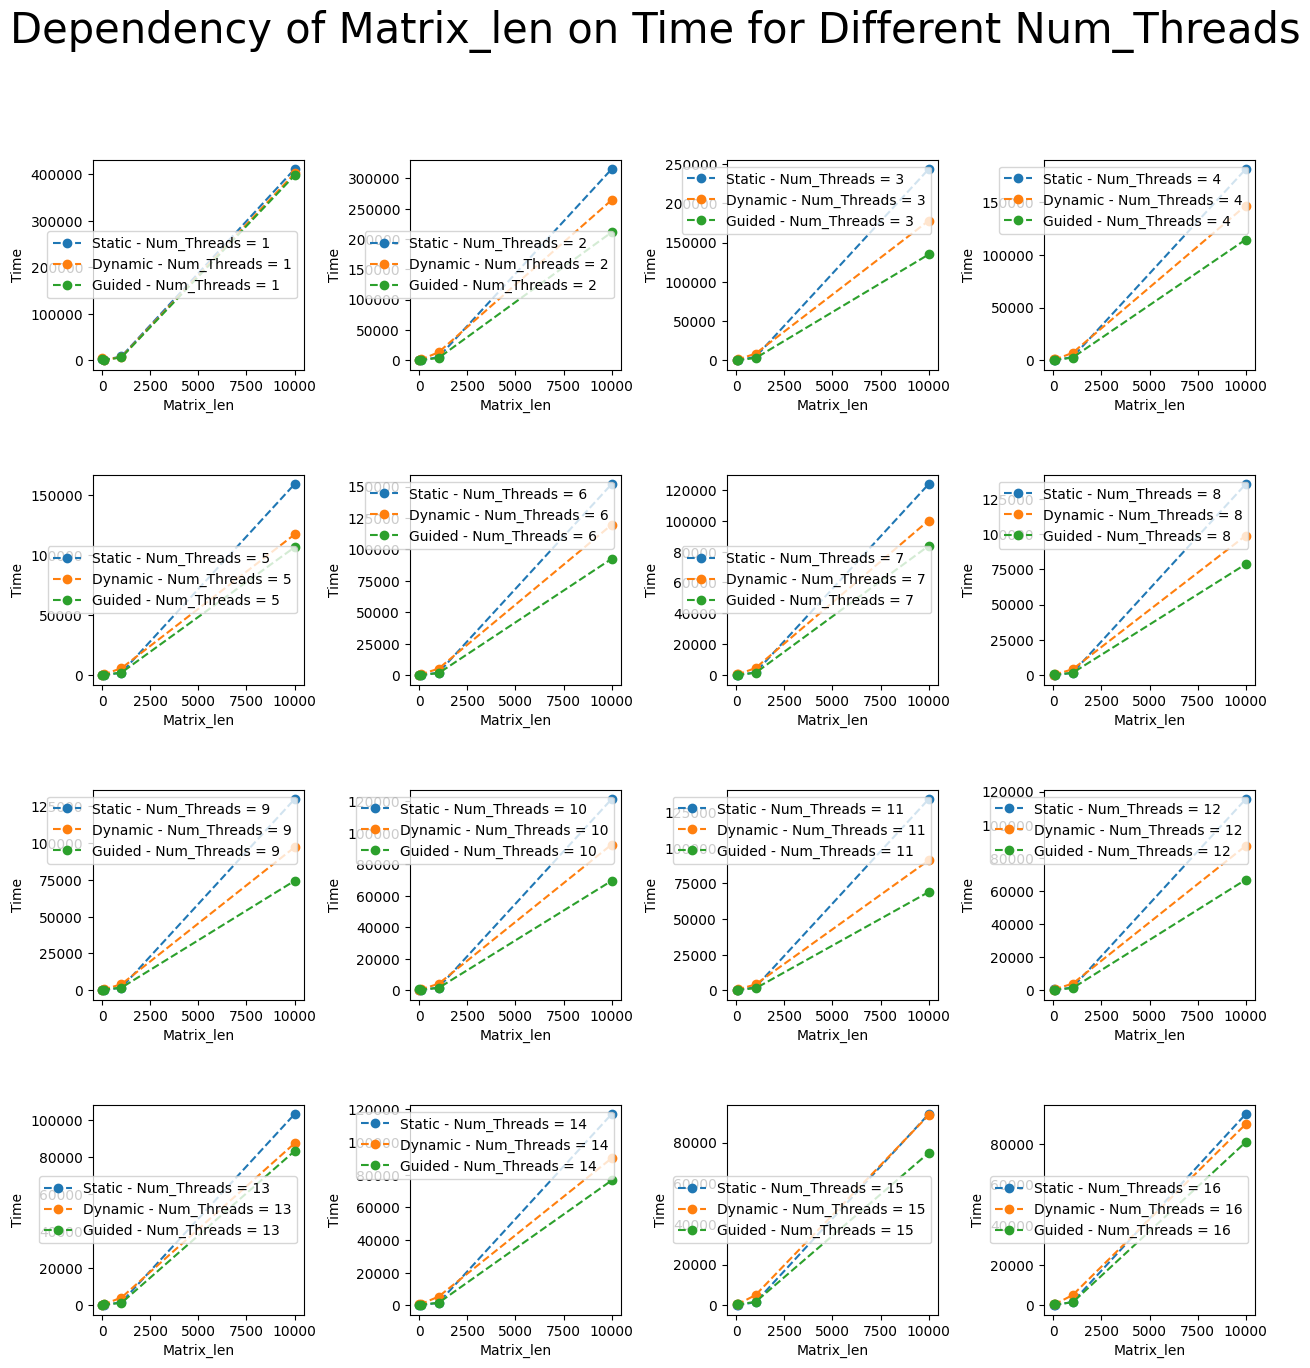

In [22]:
thread_groups_static = data_static.groupby('Num_Threads')
thread_groups_dynamic = data_dynamic.groupby('Num_Threads')
thread_groups_guided = data_guided.groupby('Num_Threads')

thread_groups = [thread_groups_static, thread_groups_dynamic, thread_groups_guided]
labels = ['Static', 'Dynamic', 'Guided']

plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Dependency of Matrix_len on Time for Different Num_Threads', fontsize=30)

for group, label in zip(thread_groups, labels):
    for thread_count, group_data in group:
        plt.subplot(4, 4, thread_count)
        plt.plot(group_data['Matrix_len'], group_data['Time'], 
                 linestyle='--', marker='o', 
                 label=f'{label} - Num_Threads = {thread_count}')

        plt.xlabel('Matrix_len')
        plt.ylabel('Time')
        plt.legend()

plt.show()

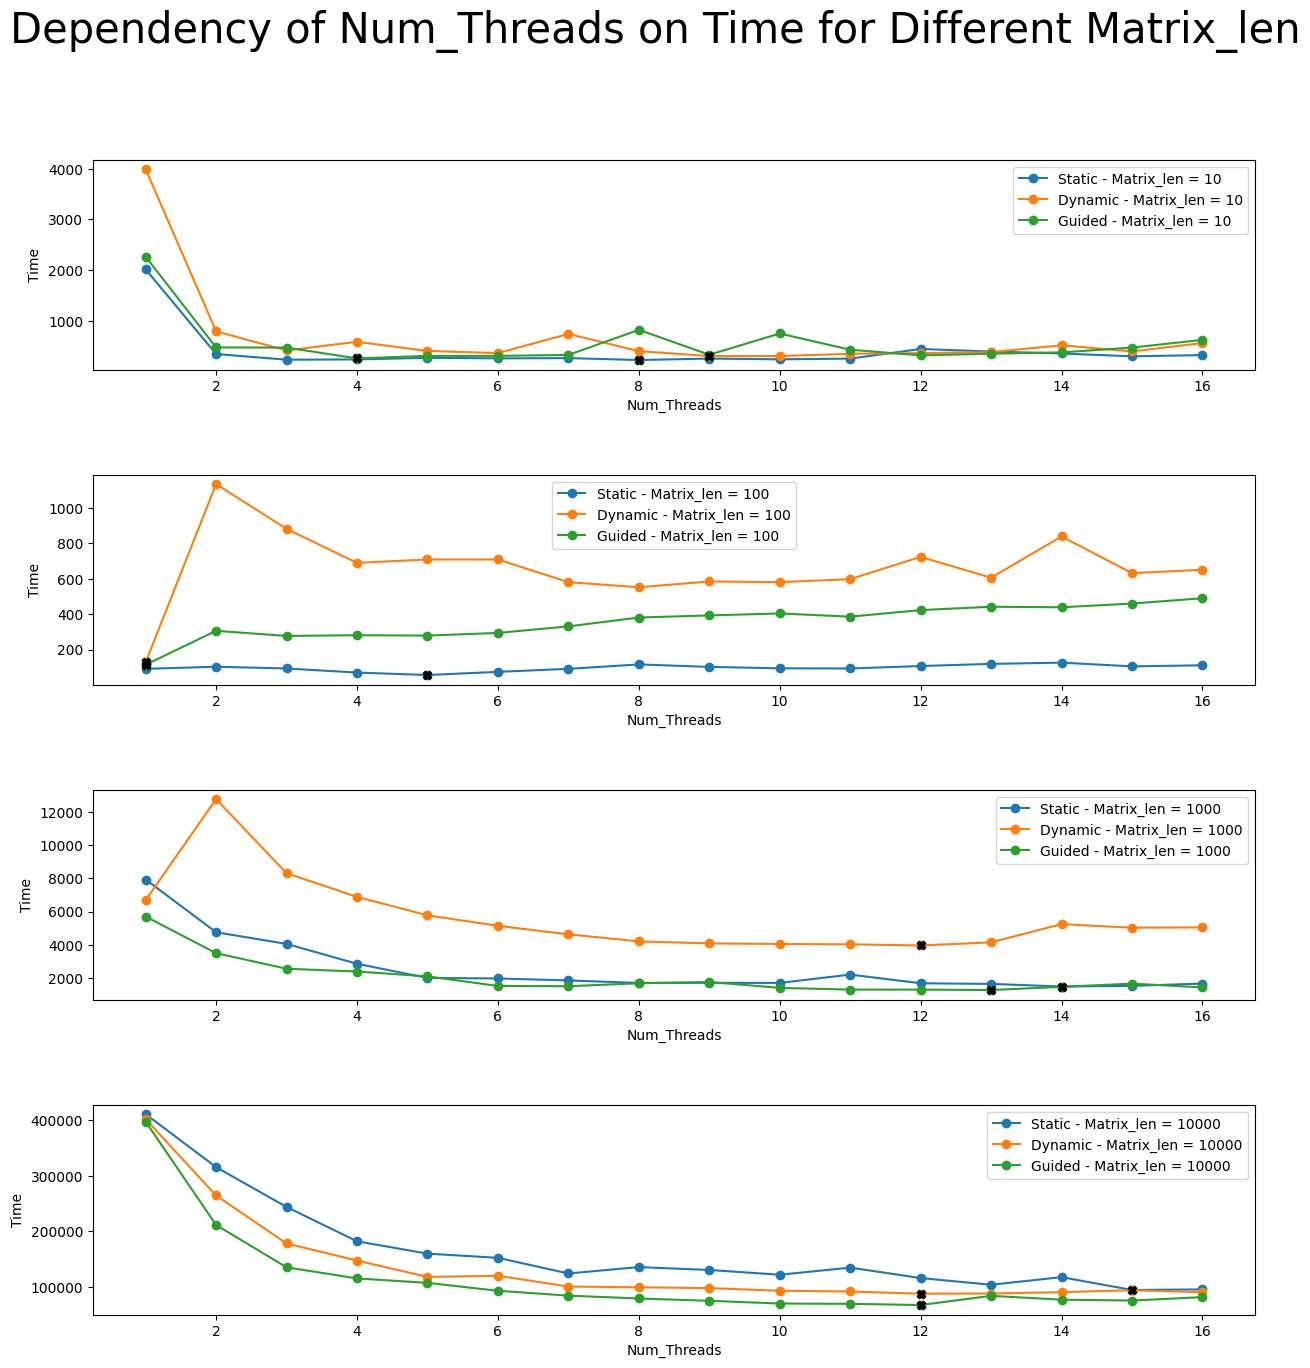

In [23]:
iter_groups_static = data_static.groupby('Matrix_len', as_index=False)
iter_groups_dynamic = data_dynamic.groupby('Matrix_len', as_index=False)
iter_groups_guided = data_guided.groupby('Matrix_len', as_index=False)

iter_groups = [iter_groups_static, iter_groups_dynamic, iter_groups_guided]
labels = ['Static', 'Dynamic', 'Guided']

plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Dependency of Num_Threads on Time for Different Matrix_len', fontsize=30)

for group, label in zip(iter_groups, labels):
    for k, (iter_value, group_data) in enumerate(group, 1):
        group_data = group_data.reset_index()
        
        plt.subplot(len(group), 1, k)
        plt.plot(group_data['Num_Threads'], group_data['Time'], 
                 marker='o', linestyle='-', 
                 label=f'{label} - Matrix_len = {iter_value}')
        
        # Выделение точки с наименьшим значением красным цветом
        min_time_idx = group_data['Time'].idxmin()
        plt.scatter(group_data['Num_Threads'].iloc[min_time_idx], group_data['Time'].iloc[min_time_idx], color='black', marker='X', zorder=10)
        plt.xlabel('Num_Threads')
        plt.ylabel('Time')
        plt.legend()

plt.show()

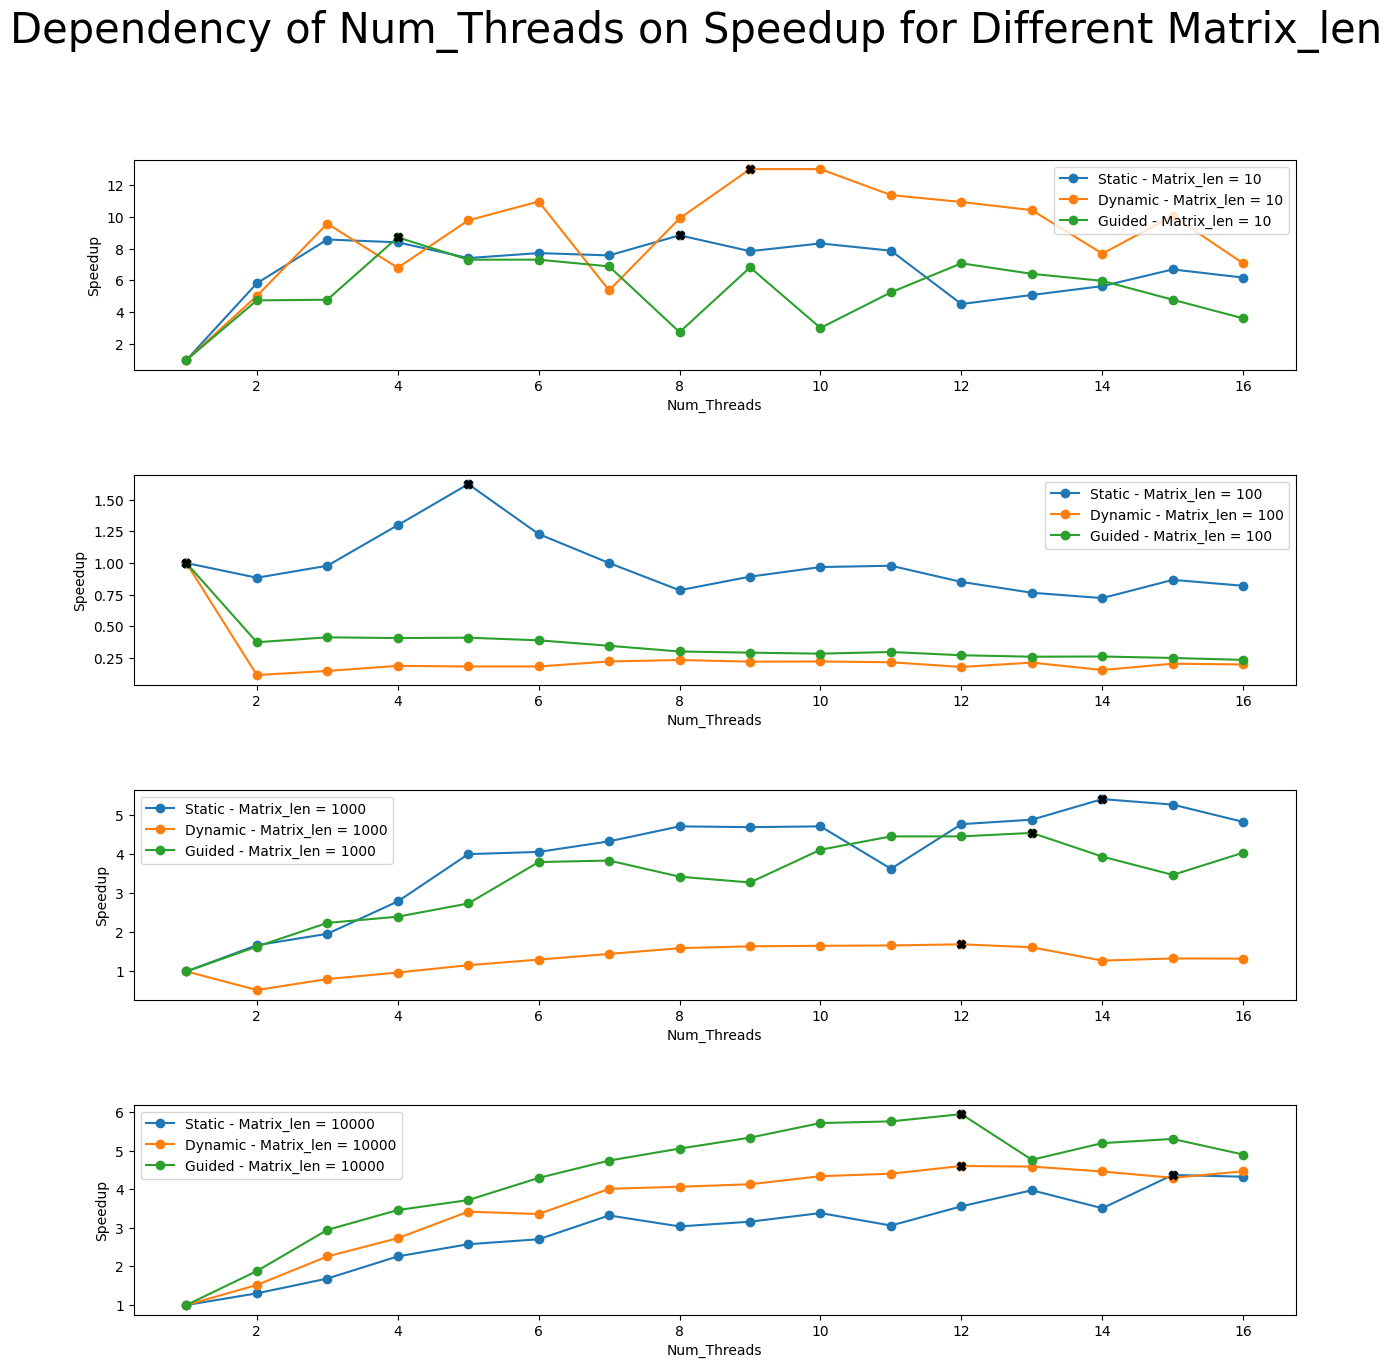

In [24]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Dependency of Num_Threads on Speedup for Different Matrix_len', fontsize=30)

base_num_threads = 1  # Базовое количество потоков для расчета ускорения

for group, label in zip(iter_groups, labels):
    for k, (iter_value, group_data) in enumerate(group, 1):
        group_data = group_data.reset_index()
        
        base_time = group_data[group_data['Num_Threads'] == base_num_threads]['Time'].values[0]
        speedup = base_time / group_data['Time']
        
        plt.subplot(len(group), 1, k)
        plt.plot(group_data['Num_Threads'], speedup, 
                 marker='o', linestyle='-', 
                 label=f'{label} - Matrix_len = {iter_value}')
        
        # Выделение точки с наибольшим значением ускорения красным цветом
        max_speedup_idx = np.argmax(speedup)
        plt.scatter(group_data['Num_Threads'].iloc[max_speedup_idx], speedup.iloc[max_speedup_idx], color='black', marker='X', zorder=10)
        
        plt.xlabel('Num_Threads')
        plt.ylabel('Speedup')
        plt.legend()

plt.show()

# Вывод:
Из представленных графиков можно составить следующий рейтинг режимов по эффективности распределения данной задачи на потоки: 
1. _Guided_
2. _Dynamic_
3. _Static_
***
##### P.s. Это справедливо, если мы оцениваем результаты в целом (для разного кол-ва потоков и итераций) с перспективой масштабирования задачи. 